# CEBD 1260 Introduction to machine learning

## Session 3 : Data preprocessing (I)

In this notebook, we will practice some important skils of data preprocessing which is vert important and mostly time consuming for data science 

NOTE: for each activity below, please refer and correspond with our course slides

Instructor: Yimin Nie

email: yimin.nie@concordia.ca

## import important libs and some helper functions

Import some libs used in this session and some helper functions

In [1]:
import numpy as np   # import numpy
import pandas as pd  # import pandas
import os
import gc   # for gabage collection
import seaborn as sns  # data visualization lib
import matplotlib.pyplot as plt
import glob
# from tqdm import tqdm
%matplotlib inline

In [2]:
# some customized function for plotting data
def plot_corr(df,cols):
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(df[cols].corr(),cmap='RdBu_r', annot=True, center=0.0)
    plt.show()
    
def plot_count(df,col,fsize,rotation=None,fillna=True):
    fig = plt.figure(figsize=fsize)
    if fillna:
        value_count = df[col].fillna('unknown').value_counts()
    sns.barplot(value_count.index,value_count.values)
    plt.xticks(rotation=rotation)
    plt.title('value counts for {}'.format(col))
    plt.show()

# The following coding activities include important/necessary steps for data preprocessing 

    1. Before any ML/DS modeling, we need to creatively preprocessing the data set so that the input is readable by the 
       machine and clean enough to feed to the model. It is extremly important steps in order to build a successful 
       model(s)
       
    2. In the following demo, I will use datasets from our projects as example partly

# Activity 1:  Missing(NaN) data analysis

Analysis of missing(NaN) data is extremely important, we will practice some key skills below

We need to know how to fill 

    (1) missing values for numerical features

    (2) missing values for categorical features

## 1.1 Identify all cols with missing values: use Sesame Credit Risk as example

In [3]:
DATA_PATH = r'C:\Users\ymnie\concordia_CEBD1260\data\\sesame_credit_risk'
file_name = os.path.join(DATA_PATH,r'application_train.csv')
file_name

'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\\\sesame_credit_risk\\application_train.csv'

In [4]:
train_df_sesame = pd.read_csv(file_name)
train_df_sesame.shape

(307511, 122)

In [5]:
train_df_sesame.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### Method 1: create a data frame for this info

to get all columns with NAN values, we need to count the # of NAN values from the table

In [6]:
train_df_sesame.isnull().sum()  # this will give you a summary of how many NAN values found in each column 

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
# Let us organize above table and sort the table in terms of # of NAN in descending order
nan_info = pd.DataFrame(train_df_sesame.isnull().sum()).reset_index()
nan_info.columns = ['feature_name','nan_cnt']
nan_info.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info['nan_percentage'] = nan_info['nan_cnt']/len(train_df_sesame)
nan_info

,feature_name,nan_cnt,nan_percentage
76,COMMONAREA_MEDI,214865,0.698723
48,COMMONAREA_AVG,214865,0.698723
62,COMMONAREA_MODE,214865,0.698723
70,NONLIVINGAPARTMENTS_MODE,213514,0.694330
56,NONLIVINGAPARTMENTS_AVG,213514,0.694330
...,...,...,...
15,NAME_HOUSING_TYPE,0,0.000000
14,NAME_FAMILY_STATUS,0,0.000000
13,NAME_EDUCATION_TYPE,0,0.000000
12,NAME_INCOME_TYPE,0,0.000000


In [8]:
train_df_sesame['COMMONAREA_MEDI'].unique(),train_df_sesame['COMMONAREA_AVG'].unique()

(array([0.0144, 0.0608,    nan, ..., 0.1631, 0.124 , 0.1648]),
 array([0.0143, 0.0605,    nan, ..., 0.2254, 0.3272, 0.162 ]))

In [13]:
train_df_sesame['COMMONAREA_MEDI'].mean(),train_df_sesame['COMMONAREA_MEDI'].median()

(0.044595101785290435, 0.0208)

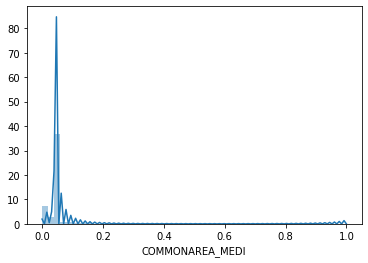

In [18]:
sns.distplot(train_df_sesame['COMMONAREA_MEDI'].fillna(train_df_sesame['COMMONAREA_MEDI'].mean()))

In [ ]:
train_df_sesame[['COMMONAREA_MEDI','COMMONAREA_AVG']]

In [19]:
# get all cols with missing data
cols_with_missing = nan_info.loc[nan_info.nan_cnt>0].feature_name.values
cols_with_missing

array(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATI

##### Method2: create a dictionary for this info 

another way to gether the information is to create a dictionary as follows

In [20]:
# get null/NaN/missing cols
nas = train_df_sesame.isna()
nacnt = {}
for f in train_df_sesame.columns:
    n = nas[f].sum()
    nacnt[n]=[]
for f in train_df_sesame.columns:
    n=nas[f].sum()
    nacnt[n].append(f)

In [21]:
nacnt # this is a dictionary which contains # of NAN as key, name of columns as value

{0: ['SK_ID_CURR',
  'TARGET',
  'NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'REGION_POPULATION_RELATIVE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'REGION_RATING_CLIENT',
  'REGION_RATING_CLIENT_W_CITY',
  'WEEKDAY_APPR_PROCESS_START',
  'HOUR_APPR_PROCESS_START',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'ORGANIZATION_TYPE',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  

In [ ]:
# nacnt[1] # this means DAYS_LAST_PHONE_CHANGE has 1 NAN value

#### brain storm: you can think about more ways to gether this information 

## 1.2 Handle missing values you found

Once you found all cols with missing values, you need to decide to 

    (1) drop them if the ratio > 0.9 for safety
    (2) or keep those cols by replace NAN values
    
 If one column contains high percentage of NAN values, we better drop them; otherwise, we shall carefully fill them by 
 following methods.
 
 NOTE: we need to handle NAN values differently for numerical and categorical features

In [ ]:
len(cols_with_missing)

#### we need to first know which column is numerical and which is categorical 

In [22]:
# let us check basic data types in each col with missing values
for f in cols_with_missing:
    print(f,':', train_df_sesame[f].dtype,' nan percentage:', nan_info.loc[nan_info.feature_name==f].nan_percentage.values[0])

COMMONAREA_MEDI : float64  nan percentage: 0.6987229725115525
COMMONAREA_AVG : float64  nan percentage: 0.6987229725115525
COMMONAREA_MODE : float64  nan percentage: 0.6987229725115525
NONLIVINGAPARTMENTS_MODE : float64  nan percentage: 0.6943296337366793
NONLIVINGAPARTMENTS_AVG : float64  nan percentage: 0.6943296337366793
NONLIVINGAPARTMENTS_MEDI : float64  nan percentage: 0.6943296337366793
FONDKAPREMONT_MODE : object  nan percentage: 0.6838617155158677
LIVINGAPARTMENTS_MODE : float64  nan percentage: 0.6835495315614726
LIVINGAPARTMENTS_AVG : float64  nan percentage: 0.6835495315614726
LIVINGAPARTMENTS_MEDI : float64  nan percentage: 0.6835495315614726
FLOORSMIN_AVG : float64  nan percentage: 0.6784862980511266
FLOORSMIN_MODE : float64  nan percentage: 0.6784862980511266
FLOORSMIN_MEDI : float64  nan percentage: 0.6784862980511266
YEARS_BUILD_MEDI : float64  nan percentage: 0.6649778381911542
YEARS_BUILD_MODE : float64  nan percentage: 0.6649778381911542
YEARS_BUILD_AVG : float64  n

In [ ]:
train_df_sesame['COMMONAREA_AVG'].unique() # always check unique values to see how they look like and distributed

In [ ]:
train_df_sesame.fillna(train_df_sesame['COMMONAREA_AVG'].mean())

train_df_sesame.fillna(train_df_sesame['COMMONAREA_AVG'].median()) #3 for skewed data distribution we better use median

In [ ]:
np.mean([1,2,3,4,5,78,888889999999,33333333333333333333333]),np.median([1,2,3,4,5,78,888889999999,33333333333333333333333])

In [ ]:
# also check the max and min value, and std to see how skew they are
print(train_df_sesame['COMMONAREA_AVG'].min())
print(train_df_sesame['COMMONAREA_AVG'].max())
print(train_df_sesame['COMMONAREA_AVG'].std())

In [23]:
train_df_sesame['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', nan, 'org spec account',
       'reg oper spec account', 'not specified'], dtype=object)

In [25]:
train_df_sesame['FONDKAPREMONT_MODE'].value_counts()

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

In [24]:
train_df_sesame['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [26]:
train_df_sesame['FONDKAPREMONT_MODE'].fillna('unknown',inplace=True)
train_df_sesame['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', 'unknown', 'org spec account',
       'reg oper spec account', 'not specified'], dtype=object)

In [ ]:
[prod1,prod2,prod3,...prod10000, prod10001]  (placeholder)  

#### WE can even plot the distribution of them to visualize how they are distributed


    (1) box plot
    (2) violin plot
    (3) normal dist plot

ValueError: cannot convert float NaN to integer

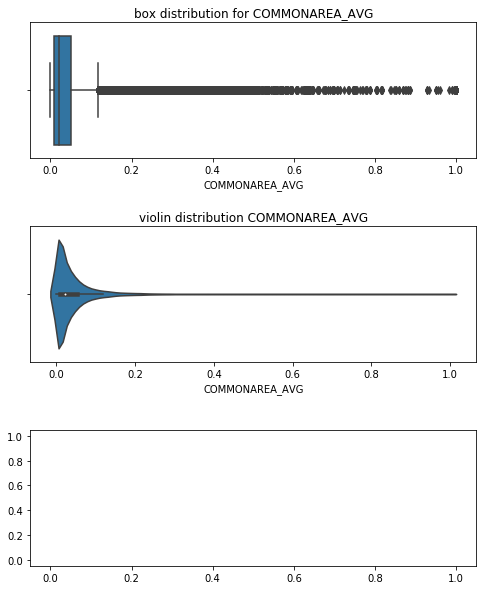

In [27]:
feature = 'COMMONAREA_AVG'
fig = plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(3,1,1)
sns.boxplot(train_df_sesame[feature])
plt.title('box distribution for {}'.format(feature))
plt.subplot(3,1,2)
sns.violinplot(train_df_sesame[feature])
plt.title('violin distribution {}'.format(feature))
plt.subplot(3,1,3)
sns.distplot(train_df_sesame[feature])
plt.title('distribution {}'.format(feature))
plt.show()

In [ ]:
# train_df_sesame['COMMONAREA_AVG'].fillna(train_df_sesame['COMMONAREA_AVG'].mean(),inplace=True)
# or
train_df_sesame['COMMONAREA_AVG'].fillna(train_df_sesame['COMMONAREA_AVG'].median(),inplace=True)
# what do you decide?

What do you decide for this col? Drop it of keep it by filling missing values?

    (1) if the col is continous variable, we usually fill the missing values by its mean or median
    (2) if the col is categorical variable, we fill the missing values by a predefined string or some special value

#### In-class exerice(10mins): try to analyze one or two features on your own dataset and fill them

## Activity 2:  Data type and conversion: use transaction fraud as example

    (1) In some columns of raw data, some values are exceptional type which might not be the same type with majority of 
        values in the column, we need to convert data type into an unified type
        
    (2) In some columns, the values are too big than they should be, e.g., 1,2,4,...100 are enough with int16 instead of 
        int32 or int64, we need to check them and try to convert into proper types so that we can reduce the memory

In [28]:
DATA_PATH = 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\transaction_fraud\\'
file_name = os.path.join(DATA_PATH,'train_transaction.csv')
file_name

'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\transaction_fraud\\train_transaction.csv'

In [29]:
train_df_fraud = pd.read_csv(file_name)
train_df_fraud.shape

(590540, 394)

In [30]:
train_df_fraud.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# check how much RAM is used by train_df
mem_use = train_df_fraud.memory_usage().sum() / 1024**3 # this data set takes >1.7G RAM, we should optimize it after
print('Memory usage of dataframe is {:.6f} GB'.format(mem_use))

Memory usage of dataframe is 1.733547 GB


In [32]:
# if we evaluate that the RAM usage is too big, we shall check if we have some space to reduce
# let us check the dtypes for each column
train_df_fraud.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [33]:
# we found isFraud is int64
train_df_fraud.isFraud.unique() # 0,1 can be int8 which is enough

array([0, 1], dtype=int64)

In [43]:
train_df_fraud.V335.max(),train_df_fraud.V335.min(),np.finfo(np.float16).max,np.finfo(np.float16).min

(55125.0, 0.0, 65500.0, -65500.0)

In [44]:
# we convert isFraud as int8
train_df_fraud['isFraud'] = train_df_fraud['isFraud'].astype(np.int8)

train_df_fraud['V335'] = train_df_fraud['V335'].astype(np.float16)

In [45]:
mem_use = train_df_fraud.memory_usage().sum() / 1024**3 # this data set takes >1.7G RAM, we should optimize it after
print('Memory usage of dataframe is {:.6f} GB'.format(mem_use))

Memory usage of dataframe is 1.726397 GB


In [41]:
np.iinfo(np.int32),np.finfo(np.float64),np.finfo(np.float16)

(iinfo(min=-2147483648, max=2147483647, dtype=int32),
 finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64),
 finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16))

#### in-class exericise (5min): convert 'TransactionAmt' into appropriate dtype

In [ ]:
train_df_fraud['TransactionAmt'] = train_df_fraud['TransactionAmt'].astype(np.float16)

# Activity 3: Date selection and indexing : Use hotel booking data

In many cases, we need to pick up a subset or subsamples from total data in terms of certain condition

In [46]:
DATA_PATH = r'C:\Users\ymnie\concordia_CEBD1260\data\hotel_booking_prediction'
file_name = os.path.join(DATA_PATH,'train.csv')
file_name

'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\hotel_booking_prediction\\train.csv'

In [47]:
train_df_hotel = pd.read_csv(file_name)
print(train_df_hotel.shape)
train_df_hotel.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [48]:
# assume you want to pick up users whose age > 32 and age<50
train_df_hotel.loc[(train_df_hotel.age>32)&(train_df_hotel.age<50)]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213410,ezuin5g4lu,2014-06-30,20140630224832,2015-01-27,-unknown-,33.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,US
213417,zhf38bsj36,2014-06-30,20140630230934,NaN,FEMALE,46.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES


# Activity 4: Feature aggregation and multiple tables joining: use sesame credit as demo

In many cases we need to aggregate or group some features These are important features for DS/ML modeling. 


## 4.1 read multiple files for credit risk data 

if you need to read multiple files under one directory, you can use glob to walkthrough them and read one by one after

In [49]:
# We want to walk through the dir and get all file names once
DATA_PATH = 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\'
file_names = glob.glob(DATA_PATH+"*.csv") # use "*.csv" to get all matched file names with .csv as extention
file_names

['C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\application_train.csv',
 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\bureau.csv',
 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\bureau_balance.csv',
 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\credit_card_balance.csv',
 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\HomeCredit_columns_description.csv',
 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\installments_payments.csv',
 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\POS_CASH_balance.csv',
 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\sesame_credit_risk\\previous_application.csv']

In [50]:
#joine main table and installment_balance 
main_train_df = pd.read_csv(file_names[0])
print(main_train_df.shape)
main_train_df.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
installments_df = pd.read_csv(file_names[5])
print(installments_df.shape)
installments_df.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
# total_df = pd.merge(main_train_df,installments_df,how='left',on='SK_ID_CURR') #do not do it directly

## 4.2 how to deal with side tables and then join with main table? 

if your ML project contains multiple tables with one main table and many side tables, we will need to merge side tables with the main table in order to leverage all availavle features. However, you need to do the following before joining 

    (1) preprocessing each table as shown above 
    (2) for each side table, we usually need to aggreate some features

then you can merge these preprocessed side tables with the main table

### 4.2.1 work on side table to aggreate 

In [52]:
installments_df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [53]:
# what am I doing? why
print(main_train_df['SK_ID_CURR'].nunique(), main_train_df.shape[0])
print(installments_df['SK_ID_CURR'].nunique(), installments_df.shape[0])

307511 307511
339587 13605401


In [54]:
installments_df.sort_values(by='SK_ID_CURR',inplace=True)
installments_df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050


In [57]:
installments_df.loc[installments_df.SK_ID_CURR==100002]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
2163032,1038818,100002,1.0,2,-535.0,-562.0,9251.775,9251.775
504426,1038818,100002,1.0,12,-235.0,-250.0,9251.775,9251.775
699804,1038818,100002,1.0,13,-205.0,-224.0,9251.775,9251.775
1675768,1038818,100002,1.0,3,-505.0,-529.0,9251.775,9251.775
3594829,1038818,100002,1.0,7,-385.0,-412.0,9251.775,9251.775
210205,1038818,100002,1.0,8,-355.0,-375.0,9251.775,9251.775
2144879,1038818,100002,1.0,1,-565.0,-587.0,9251.775,9251.775
2785201,1038818,100002,1.0,11,-265.0,-284.0,9251.775,9251.775
1703436,1038818,100002,1.0,15,-145.0,-160.0,9251.775,9251.775
185679,1038818,100002,1.0,16,-115.0,-133.0,9251.775,9251.775


In [ ]:
# we observed that in installments_df, one customer id can appear multiple times

In [60]:
add = pd.DataFrame(installments_df.groupby('SK_ID_CURR')['AMT_PAYMENT'].mean()).reset_index()
add.columns = ['SK_ID_CURR','AMT_PAYMENT_mean']
add    # this shows the average of payment for each client historically

,SK_ID_CURR,AMT_PAYMENT_mean
0,100001,5885.132143
1,100002,11559.247105
2,100003,64754.586000
3,100004,7096.155000
4,100005,6240.205000
...,...,...
339582,456251,7492.924286
339583,456252,10069.867500
339584,456253,4115.915357
339585,456254,10239.832895


In [64]:
main_train_df = pd.merge(main_train_df,add,how='left',on='SK_ID_CURR')

In [65]:
main_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_PAYMENT_mean
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,11559.247105
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,64754.586000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,7096.155000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,62947.088438
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,12214.060227


In [66]:
# installments_df.groupby('SK_ID_CURR')['AMT_PAYMENT'].std() # this shows the max of payment for each client historically

### 4.2.2 how could we write script to gether all aggreagated info? 

In [67]:
installments_df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050


In [68]:
# define your aggregation dict
agg_dict = {
    'AMT_INSTALMENT':['mean','max','min','median','sum'],
    'AMT_PAYMENT':['mean','max','min','std'],
}
 
# you can add more if you think you need to aggregate more usefull features

In [69]:
agg_df = installments_df.groupby('SK_ID_CURR').agg(agg_dict)

In [70]:
agg_df.head()

AMT_INSTALMENT                                                \
                     mean         max       min     median          sum   
SK_ID_CURR                                                                
100001        5885.132143   17397.900  3951.000   3980.925    41195.925   
100002       11559.247105   53093.745  9251.775   9251.775   219625.695   
100003       64754.586000  560835.360  6662.970  64275.615  1618864.650   
100004        7096.155000   10573.965  5357.250   5357.250    21288.465   
100005        6240.205000   17656.245  4813.200   4813.200    56161.845   

             AMT_PAYMENT                                       
                    mean         max       min            std  
SK_ID_CURR                                                     
100001       5885.132143   17397.900  3951.000    5076.676624  
100002      11559.247105   53093.745  9251.775   10058.037722  
100003      64754.586000  560835.360  6662.970  110542.592300  
100004       7096.155000   10573.965  5357.250    3011.871810  
100005       6240.205000   17656.245  4813.200    4281.015000

In [71]:
agg_df.columns = ['INSTALLMENT_{}_{}'.format(x[0],x[1]) for x in agg_df.columns.tolist()]
agg_df.head()

,INSTALLMENT_AMT_INSTALMENT_mean,INSTALLMENT_AMT_INSTALMENT_max,INSTALLMENT_AMT_INSTALMENT_min,INSTALLMENT_AMT_INSTALMENT_median,INSTALLMENT_AMT_INSTALMENT_sum,INSTALLMENT_AMT_PAYMENT_mean,INSTALLMENT_AMT_PAYMENT_max,INSTALLMENT_AMT_PAYMENT_min,INSTALLMENT_AMT_PAYMENT_std
SK_ID_CURR,,,,,,,,,
100001,5885.132143,17397.900,3951.000,3980.925,41195.925,5885.132143,17397.900,3951.000,5076.676624
100002,11559.247105,53093.745,9251.775,9251.775,219625.695,11559.247105,53093.745,9251.775,10058.037722
100003,64754.586000,560835.360,6662.970,64275.615,1618864.650,64754.586000,560835.360,6662.970,110542.592300
100004,7096.155000,10573.965,5357.250,5357.250,21288.465,7096.155000,10573.965,5357.250,3011.871810
100005,6240.205000,17656.245,4813.200,4813.200,56161.845,6240.205000,17656.245,4813.200,4281.015000


In [72]:
main_train_df = main_train_df.merge(agg_df,on='SK_ID_CURR',how='left') # merge with main table
main_train_df.shape

(307511, 132)

In [73]:
main_train_df.head()
# now you can observe the main table grow from 122 columns to 129 columns

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_PAYMENT_mean,INSTALLMENT_AMT_INSTALMENT_mean,INSTALLMENT_AMT_INSTALMENT_max,INSTALLMENT_AMT_INSTALMENT_min,INSTALLMENT_AMT_INSTALMENT_median,INSTALLMENT_AMT_INSTALMENT_sum,INSTALLMENT_AMT_PAYMENT_mean,INSTALLMENT_AMT_PAYMENT_max,INSTALLMENT_AMT_PAYMENT_min,INSTALLMENT_AMT_PAYMENT_std
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,11559.247105,11559.247105,53093.745,9251.775,9251.775,219625.695,11559.247105,53093.745,9251.775,10058.037722
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,64754.586000,64754.586000,560835.360,6662.970,64275.615,1618864.650,64754.586000,560835.360,6662.970,110542.592300
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,7096.155000,7096.155000,10573.965,5357.250,5357.250,21288.465,7096.155000,10573.965,5357.250,3011.871810
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,62947.088438,62947.088438,691786.890,2482.920,29027.520,1007153.415,62947.088438,691786.890,2482.920,168097.624347
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,12214.060227,12666.444545,22678.785,1821.780,16037.640,835985.340,12214.060227,22678.785,0.180,8048.060877


## Activity 5: Lambda expression : Fraud detection as demo

WE might need to perform some complicated preprocessing on certain features over all data set, lambda expression can help with speed up the process

In [74]:
DATA_PATH = 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\transaction_fraud\\'
file_name = os.path.join(DATA_PATH+"train_transaction.csv")
file_name

'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\transaction_fraud\\train_transaction.csv'

In [75]:
train_df_fraud = pd.read_csv(file_name)
print(train_df_fraud.shape)
train_df_fraud.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5.1 use lambda expression on col: ' TransactionAmt' to perform the following task

x -> log(x)

x-> exp(x), sqrt(x), log(x), x+3, x^2 

In [76]:
%%time
y = []
for i in range(len(train_df_fraud[:20000])):
    y.append(np.log(train_df_fraud.iloc[i]['TransactionAmt']+1)) #traditional way is to do log(x) by iterating 

Wall time: 15.7 s


In [80]:
%%time
train_df_fraud['TransactionAmtLog'] = train_df_fraud['TransactionAmt'].apply(lambda x: np.log(x) if x>100 else x)
# train_df_fraud['TransactionAmtLog'] = train_df_fraud['TransactionAmt'].apply(np.sum) # or this is even faster

Wall time: 550 ms


In [81]:
%%time
y = []
for i in range(len(train_df_fraud[:20000])):
    x = train_df_fraud.iloc[i]['TransactionAmt']
    x = np.exp(x)
    x = np.sqrt(x)
    x = np.log(x)
    x = x+3
    x = x**2
    y.append(x) 

Wall time: 14.7 s


In [82]:
def my_func(x):
    x = np.exp(x)
    x = np.sqrt(x)
    x = np.log(x)
    x = x+3
    x = x**2
    return x

In [83]:
%%time
train_df_fraud['TransactionAmtLog'] = train_df_fraud['TransactionAmt'].apply(my_func)

Wall time: 3.84 s


In [ ]:
%%time
train_df_fraud['TransactionAmtLog'] = train_df_fraud['TransactionAmt'].apply(lambda x:my_func(x))

# Activity 6: process categorical data in depth - hotel booking as demo

Categorical data is special for data processing. It needs to be converted into numerical values so that computer can handle them

There are two typical methods to convert categorical features into numerical ones

    (1) one-hot encoding: e.g., [male, female] = [[1,0],[0,1]], ['cat', 'tigher', 'rat'] = [[1,0,0],[0,1,0],[0,0,1]]
    
    (2) label encoding: e.g., ['very bad', 'bad', 'fair', 'good', 'great'] = [0,1,2,3,4] 
                                'very bad'->0, 'bad'->1, 'fair'->2, 'good'->3, 'great'->4
    

In [91]:
DATA_PATH = r'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\hotel_booking_prediction'
file_name = os.path.join(DATA_PATH,'train.csv')
train_df_hotel = pd.read_csv(file_name)
print(train_df_hotel.shape)
train_df_hotel.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## 6.1 One-hot-encoding / dummy variables


We use 'affiliate_channel' as example

In [85]:
train_df_hotel['affiliate_channel'].unique() # channels used for booking hotel by users
#this columne needs to be converted into numeraical feature

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

In [86]:
# we want to convert this col using one-hot-coding
temp_df = pd.get_dummies(train_df_hotel['affiliate_channel'],prefix='affiliate_channel')
print(temp_df.shape)
temp_df.head()

(213451, 8)


,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [87]:
# let us concat the newly generated on-hot feature on the main table
train_df_hotel = pd.concat([train_df_hotel,temp_df],axis=1)
train_df_hotel.shape

(213451, 24)

In [88]:
train_df_hotel.head() # we see the one-hot encoded part is concatenated on the right of the table

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_browser,country_destination,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,...,Chrome,NDF,0,0,1,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,Chrome,NDF,0,0,0,0,0,0,0,1
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,IE,US,0,0,1,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Firefox,other,0,0,1,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Chrome,US,0,0,1,0,0,0,0,0


In [89]:
train_df_hotel.drop('affiliate_channel',axis=1,inplace=True) # drop original column (no need anymore)
train_df_hotel.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_provider,...,first_browser,country_destination,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,...,Chrome,NDF,0,0,1,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,google,...,Chrome,NDF,0,0,0,0,0,0,0,1
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,IE,US,0,0,1,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Firefox,other,0,0,1,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Chrome,US,0,0,1,0,0,0,0,0


#### In-class practice (15mins):

for above data, find all categorical cols and perform one-hot-encoding and concatenate into main table

In [ ]:
cat_cols = []
for f in train_df_hotel.columns.values:
    if f in ['id','country_destination','date_account_created','date_first_booking']:continue
    if train_df_hotel[f].dtype=='object':
        cat_cols.append(f)
cat_cols

In [ ]:
for f in cat_cols:
    train_df_hotel[f] = train_df_hotel[f].astype('category') # force to convert in order to avoid some dirty value to throw exception
    print(f,train_df_hotel[f].dtype,train_df_hotel[f].nunique())

In [ ]:
for f in tqdm(cat_cols):#tqdm will show progress bar
    print(f)
    df = pd.get_dummies(train_df_hotel[f],prefix=f)
    train_df_hotel = pd.concat([train_df_hotel,df],axis=1)
    train_df_hotel.drop(f,axis=1,inplace=True)

In [ ]:
train_df_hotel.head()

## 6.2 label encoding / factorize using sklearn lib 

In [90]:
from sklearn.preprocessing import LabelEncoder

In [92]:
train_df_hotel['affiliate_channel']

0            direct
1               seo
2            direct
3            direct
4            direct
            ...    
213446    sem-brand
213447       direct
213448       direct
213449        other
213450       direct
Name: affiliate_channel, Length: 213451, dtype: object

In [95]:
le = LabelEncoder()
train_df_hotel['affiliate_channel']=le.fit_transform(train_df_hotel['affiliate_channel'])
# label encoder will transfer categorical values to integer instead of one-hot

In [96]:
train_df_hotel['affiliate_channel']

0         2
1         7
2         2
3         2
4         2
         ..
213446    5
213447    2
213448    2
213449    3
213450    2
Name: affiliate_channel, Length: 213451, dtype: int32

In [97]:
le.classes_

array(['api', 'content', 'direct', 'other', 'remarketing', 'sem-brand',
       'sem-non-brand', 'seo'], dtype=object)

In [98]:
#inverse transform to recover the original features
le.inverse_transform([0, 0, 1, 2])

array(['api', 'api', 'content', 'direct'], dtype=object)

In [99]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7])

array(['api', 'content', 'direct', 'other', 'remarketing', 'sem-brand',
       'sem-non-brand', 'seo'], dtype=object)

In [ ]:
encoded = train_df_hotel['affiliate_channel'].factorize(sort=True) # or use pandas factorize function
encoded

## Activity 7: sparse matrix：insurance quote as demo

IF there are too many categorical features in your task and you obtained a huge matrix with sparse values, we need to consider sparse matrix

In [100]:
DATA_PATH = 'C:\\Users\\ymnie\\concordia_CEBD1260\\data\\home_insurance_quote_flag\\'
file_name = os.path.join(DATA_PATH+"train.csv")
train_df_insurance = pd.read_csv(file_name)

In [104]:
train_df_insurance.shape

(260753, 299)

In [101]:
train_df_insurance.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [105]:
train_df_insurance['Field9'].nunique()

5

In [102]:
np.unique(train_df_insurance.dtypes.values)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [103]:
cat_cols =[f for f in train_df_insurance if 'object' in str(train_df_insurance[f].dtype)]
n = 0 
for f in cat_cols:
    if f in ['QuoteNumber','QuoteConversion_Flag','Original_Quote_Date']:continue
    print(f,':',train_df_insurance[f].nunique())
    n+=train_df_insurance[f].nunique()
print(n)

Field6 : 8
Field10 : 8
Field12 : 2
CoverageField8 : 7
CoverageField9 : 12
SalesField7 : 7
PersonalField7 : 2
PersonalField16 : 50
PersonalField17 : 66
PersonalField18 : 61
PersonalField19 : 57
PropertyField3 : 2
PropertyField4 : 2
PropertyField5 : 2
PropertyField7 : 19
PropertyField14 : 4
PropertyField28 : 4
PropertyField30 : 2
PropertyField31 : 4
PropertyField32 : 2
PropertyField33 : 4
PropertyField34 : 2
PropertyField36 : 2
PropertyField37 : 2
PropertyField38 : 2
GeographicField63 : 3
GeographicField64 : 4
340


In [106]:
# it show there will be 340 columns if we one-hot encode all columns
# the way to deal with large but sparse matrix is to use sparse matrix storage

from scipy.sparse import csr_matrix, hstack

In [107]:
X = csr_matrix(pd.get_dummies(train_df_insurance['PersonalField17'],prefix='PersonalField17',sparse=True)).tocsr()
X

<260753x66 sparse matrix of type '<class 'numpy.uint8'>'
	with 260753 stored elements in Compressed Sparse Row format>

In [ ]:
y = csr_matrix(pd.get_dummies(train_df_insurance['PersonalField18'],prefix='PersonalField18',sparse=True)).tocsr()
y

In [ ]:
total = hstack((X,y))
total
# we see that the total matrix is 188 columns but it take less RAM

## Homework for session 3

There will be no THEORY homework on session 3. Since we have to digest a lot of coding skills on session 3, your homework is to organize and complete data preprocessing part based on the demo above.

for example:

    (1) fill/deal with missing data for all columne if applicable;
    
    (2) convert types correctly for all incorrect types if applicable
    
    (3) process all categorical variables and encode them using proper method
 
You shall show your mile stone work in TWO weeks by sending me your code. You code might not be very mature or completed well, it is ok but I need to collect information where you are and give you feedbacks.